In [1]:
from __future__ import division

#import tabular as tb
import numpy as np
import matplotlib.mlab as ml
import matplotlib.pyplot as pp
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import AxesGrid
from scipy.interpolate import Rbf
from pylab import imread, imshow
import matplotlib
import statistics
layout = imread('/Users/tagore_pothuneedi/Desktop/map.png')

a={}
sta_loc={"sta1":(83,1239),"sta2":(1174,1237),"sta3":(1936,1258),"sta4":(356,954),"sta5":(578,855),"sta6":(1448,970),"sta7":(154,519),"sta8":(1653,495),"sta9":(107,197),"sta10":(1004,183),"sta11":(1955,212)}


image_width= len(layout[0])
image_height= len(layout) - 1

num_x = int(image_width / 4)
num_y = int(num_x / (image_width / image_height))
#print()"Resolution: %0.2f x %0.2f" % (num_x, num_y)

x = np.linspace(0,image_width, num_x)

y = np.linspace(0,image_height, num_y)

gx, gy = np.meshgrid(x, y)
gx, gy = gx.flatten(), gy.flatten()

levels = [-85, -80, -75, -70, -65, -60, -55, -50, -45, -40, -35, -30, -25]

interpolate = True


In [2]:
##Data grouping from different logs of stations
data={}
for num in range(1,12):
    file=open('/Users/tagore_pothuneedi/testv1/test_logs/192.168.0.186_sta{}_2020-06-22_1592870286.log'.format(num),'r')
    op=file.read()
    op=op.strip()
    op=op.split('\n')
    ## station mac:op[0][8:25]
    ## signal level: op[1][11:17]
    i=0
    a={}
    for item in op:
        if i%3==0:
            key=item[8:25]
            a[key]=op[i+1][11:14]
            i+=1
        else:
            i+=1
            continue
    data['sta{}'.format(num)]=a
    #data.append(a)
#data

In [3]:
## MAC addr of stations detected in the mesh
sta_dec=set()
for station in data:
    for values in data[station].keys():
        sta_dec.add(values)
sta_dec

{'06:20:62:c8:24:14',
 '2e:12:76:00:ee:f7',
 '2e:b9:2a:d2:a8:32',
 '36:50:f8:ba:82:69',
 '3e:4d:c3:d2:1b:79',
 '6a:3b:09:36:b2:bb',
 '6e:b7:7f:42:cd:88',
 '86:4f:55:f5:91:49',
 'c6:e1:6d:cc:a1:d7',
 'ee:56:82:17:82:c2',
 'f2:30:7a:99:42:b4'}

In [4]:
## signal from different station at location
a={}
for i,j in zip(sta_loc.values(),data.values()):
     a[i]=j

In [5]:
## a.keys() -- all x,y
## a[(83, 1239)] -- gives rssi at x,y

In [6]:
locx=[]
locy=[]
for value in sta_loc.values():
    locx.append(value[0])
    locy.append(value[1])

In [7]:
a

{(83, 1239): {'ee:56:82:17:82:c2': '-71',
  '2e:12:76:00:ee:f7': '-70',
  'c6:e1:6d:cc:a1:d7': '-77',
  '6e:b7:7f:42:cd:88': '-64',
  '36:50:f8:ba:82:69': '-78',
  '06:20:62:c8:24:14': '-68',
  '2e:b9:2a:d2:a8:32': '-64',
  '86:4f:55:f5:91:49': '-68',
  'f2:30:7a:99:42:b4': '-55',
  '6a:3b:09:36:b2:bb': '-61'},
 (1174, 1237): {'ee:56:82:17:82:c2': '-65',
  '3e:4d:c3:d2:1b:79': '-64',
  '2e:12:76:00:ee:f7': '-68',
  'c6:e1:6d:cc:a1:d7': '-71',
  '6e:b7:7f:42:cd:88': '-67',
  '36:50:f8:ba:82:69': '-74',
  '06:20:62:c8:24:14': '-55',
  '86:4f:55:f5:91:49': '-70',
  'f2:30:7a:99:42:b4': '-60',
  '6a:3b:09:36:b2:bb': '-58'},
 (1936, 1258): {'ee:56:82:17:82:c2': '-69',
  '3e:4d:c3:d2:1b:79': '-77',
  '2e:12:76:00:ee:f7': '-74',
  '6e:b7:7f:42:cd:88': '-77',
  '36:50:f8:ba:82:69': '-65',
  '06:20:62:c8:24:14': '-68',
  '2e:b9:2a:d2:a8:32': '-71',
  '86:4f:55:f5:91:49': '-78',
  'f2:30:7a:99:42:b4': '-75',
  '6a:3b:09:36:b2:bb': '-74'},
 (356, 954): {'ee:56:82:17:82:c2': '-67',
  '3e:4d:c3:d2:

In [11]:
def max_plot():
    # Get the maximum RSSI seen for each beacon
# rssi_mac=[]
# for loc in a.keys():
#     try:
#         rssi_mac.append(a[loc][sta_dec])
#     except:
#         rssi_mac.append('0')
#         continue
    res=[]
    for station in sta_dec:
        temp=[]
        for loc in a.keys():
            try:
                temp.append(int(a[loc][station]))
            except:
                temp.append(0)
                continue
        #print(temp)
        res.append(statistics.mean(temp))
    #rssi_mac
    pp.title("Mean RSSI Heat Map")

    if interpolate:
        # Interpolate the data
        rbf = Rbf(locx, locy, res, function='linear')

        z = rbf(gx, gy)
        z = z.reshape((num_y, num_x))

        # Render the interpolated data to the plot
        # begin color mapping
        norm = matplotlib.colors.Normalize(vmin=min(res), vmax=max(res), clip=True)
        mapper = cm.ScalarMappable(norm=norm, cmap='RdYlBu_r')
        # end color mapping
        image = pp.imshow(z,extent=(0,image_width,image_height, 0),cmap='RdYlBu_r', alpha=0.5, zorder=100)
    else:
        z = ml.griddata(locx, locy ,res, x, y)

        pp.contourf(x, y, z, levels, alpha=0.5)
    
    pp.colorbar(image)
    pp.imshow(layout, interpolation='bicubic', zorder=1, alpha=1)

    #pp.show()
    print(res,locx,locy)

[-59.81818181818182, -61, -57.45454545454545, -61.45454545454545, -66.18181818181819, -59.90909090909091, -58.72727272727273, -59.27272727272727, -56.72727272727273, -66.18181818181819, -59.09090909090909] [83, 1174, 1936, 356, 578, 1448, 154, 1653, 107, 1004, 1955] [1239, 1237, 1258, 954, 855, 970, 519, 495, 197, 183, 212]


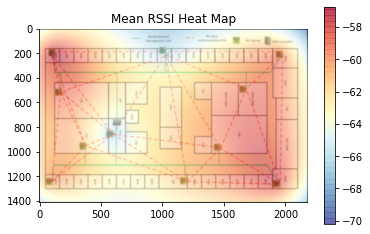

In [12]:
max_plot()